## HD 2039

Radial velocity data for HD2039 were obtained from Tinney et al.(2003).


Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data


We define a radial velocity model. It has 5 parameters: amplitude, period, eccentricity, longitude of periastron, phase since periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 1000.0, 0.0]
hilim = [200.0, 1500.0, 0.99]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )
print( mdl.npchain, mdl.npbase )
print( [mdl.getPrior(k).lowLimit for k in range( mdl.npchain )])



Polynomial: f( x:p ) = p_0 +
RadialVelocity 
6 1
[0.0, 0.0, 1000.0, 0.0, 0.0, 0.0]


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with with unknown scale
Moving the walkers with   GalileanEngine
Iteration   logZ        H     LowL     npar    parameters
       0 -3571791828.8      4.6 -3571791824.2      7  [   92.195   74.282 1094.188    0.806    1.665 ...]


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.4-py3.5.egg/BayesicFitting/source/FixedModel.py:362: UserWarning: RadialVelocity has no partials defined; using numeric partials.


     100 -21426.5      5.6 -21420.9      7  [  143.393   57.335 1433.680    0.824    6.263 ...]
     200   -733.7      6.6   -727.1      7  [  134.359  188.678 1149.172    0.736    0.953 ...]
     300   -272.6      7.1   -265.1      7  [  158.268   62.191 1031.888    0.825    1.070 ...]
     400   -212.6      6.5   -205.4      7  [   79.840   28.238 1145.320    0.303    1.837 ...]
     500   -197.2      6.1   -190.2      7  [   20.156   24.042 1396.246    0.184    5.547 ...]
     600   -192.5      6.2   -185.2      7  [   34.929   16.983 1214.341    0.122    2.751 ...]
     700   -189.3      6.7   -181.5      7  [   11.038    5.637 1098.981    0.589    0.303 ...]
     800   -186.1      7.8   -176.8      7  [   14.182   62.035 1388.509    0.150    4.292 ...]
     900   -182.8      8.9   -172.6      7  [    9.086   63.463 1382.157    0.166    4.201 ...]
    1000   -178.8     10.1   -167.6      7  [   40.582   89.469 1239.316    0.352    4.577 ...]
    1100   -174.4     11.4   -162.0     

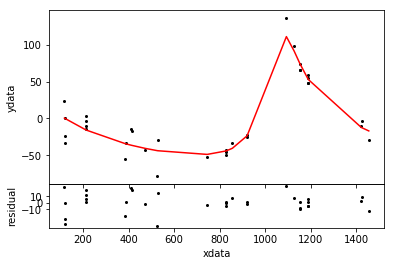

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, seed=1308 )
ns.verbose = 2
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )

# RadialVelocityModel has no partial. Numeric partials are used in stead.

In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( sl.scale ), fmt( sl.stdevScale ) )
print( evi )

[   74.021   82.824 1233.347    0.564    4.062    2.635]
[    6.652    4.969   19.970    0.025    0.127    0.087]
   15.210     1.884
-69.06001367982545


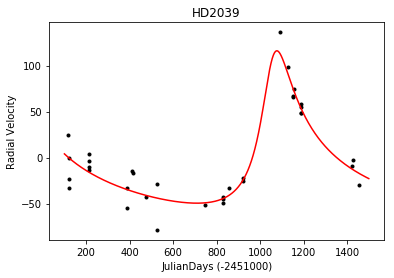

In [7]:
plt.plot( jd, rv, 'k. ' )
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.show()